<h1 align=center><font size = 5>Bitcoin OTC trust weighted signed network
</font></h1>

<h0 align=left><font size = 3>#bitcoin-otc is an over-the-counter marketplace for trading with bitcoin. The marketplace is located in #bitcoin-otc channel on the freenode IRC network. </font></h0>

https://www.bitcoin-otc.com/

<h0 align=left><font size = 3>To complement the OTC marketplace, they offer a web of trust service. Due to the p2p nature of OTC transactions, people are exposed to counterparty risk. To mitigate this risk, they need to have access to their counterparty's reputation and trade history. This is precisely the kind of information that the OTC web of trust provides. </font></h0>

## Data Set information 

<h0 align=left><font size = 3>This is who-trusts-whom network of people who trade using Bitcoin on a platform called Bitcoin OTC. Since Bitcoin users are anonymous, there is a need to maintain a record of users' reputation to prevent transactions with fraudulent and risky users. Members of Bitcoin OTC rate other members in a scale of -10 (total distrust) to +10 (total trust) in steps of 1. This is the first explicit weighted signed directed network available for research. </font></h0>

## Data format 

<h0 align=left><font size = 3>Each line has one rating, sorted by time, with the following format:

SOURCE, TARGET, RATING, TIME</font></h0>


## Necessary libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Necessary functions 

In [2]:
def draw_graph (G_sample):
    # draw the network G1
    fig= plt.figure(figsize=(20,15))
    nx.draw_spring(G_sample,node_color = 'g',with_labels=False,node_size=150,edge_color='Gray',alpha=0.7)
    return 

## Data preparations

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data.head()

,Source,Target,Score,Time
0,6,2,4,1.289242e+09
1,6,5,2,1.289242e+09
2,1,15,1,1.289243e+09
3,4,3,7,1.289245e+09
4,13,16,8,1.289254e+09


<h0 align=left><font size = 3>For instance I won't use the Time information as I will consider all scoring was on the same time for eveyone </font></h0>

In [5]:
data.columns

Index(['Source', 'Target', 'Score', 'Time'], dtype='object')

In [6]:
data.drop('Time', axis = 1,inplace = True)

In [7]:
print("The data size is : {} ".format(data.shape))

The data size is : (35592, 3) 


## Graph construction 

In [8]:
import networkx as nx

In [9]:
data_array=np.array(data)

In [10]:
G=nx.DiGraph()

In [11]:
data_array.shape[0]

35592

In [12]:
for i in range (data_array.shape[0]): 
    G.add_edge(data_array[i][0],data_array[i][1],score=data_array[i][2])

In [13]:
G.is_directed()

True

In [14]:
G.number_of_nodes()

5881

In [15]:
G.number_of_edges()

35592

In [16]:
G.edges(data=True);

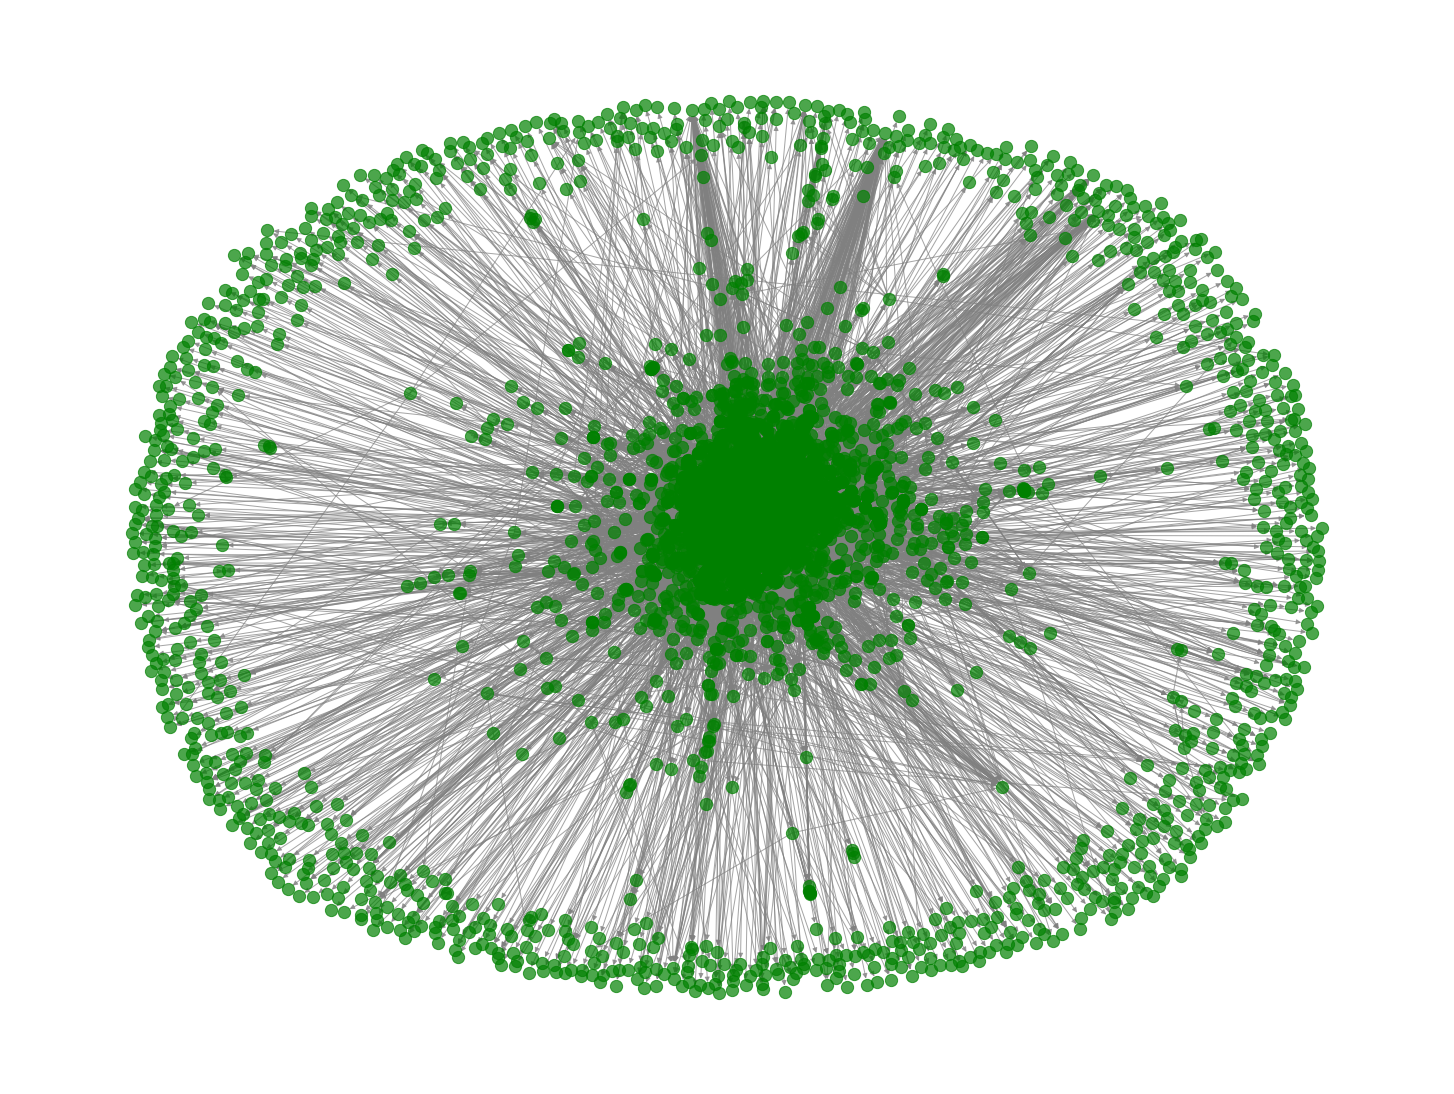

In [17]:
draw_graph(G)

## Components in the Graph 

In [18]:
# Getting the number of nodes as a beginning 
G.number_of_nodes()

5881

### Semiconnectedness 

<h0 align=left><font size = 3>A semi-connected graph is a graph that for each pair of vertices u,v, there is either a path from u to v or a path from v to u.  </font></h0>

In [19]:
nx.is_semiconnected(G)

False

### Weak connectivity

In [20]:
nx.is_weakly_connected(G)

False

In [21]:
nx.number_weakly_connected_components(G)

4

In [22]:
[len(c) for c in sorted(nx.weakly_connected_components(G),
...                         key=len, reverse=True)]

[5875, 2, 2, 2]

<h0 align=left><font size = 2>So I will give all my focus to the first component because it contains the majority of the nodes . </font></h0>

In [23]:
G_lar_weak = max(nx.weakly_connected_component_subgraphs(G),key=len)

### Strong connectivity

<h0 align=left><font size = 3>In the mathematical theory of directed graphs, a graph is said to be strongly connected or diconnected if every vertex is reachable from every other vertex.  </font></h0>

In [24]:
nx.is_strongly_connected(G)

False

In [25]:
nx.number_strongly_connected_components(G)

1144

In [26]:
max([len(c) for c in sorted(nx.strongly_connected_components(G),
...                         key=len, reverse=True)])

4709

In [27]:
G_lar_str = max(nx.strongly_connected_component_subgraphs(G),key=len)

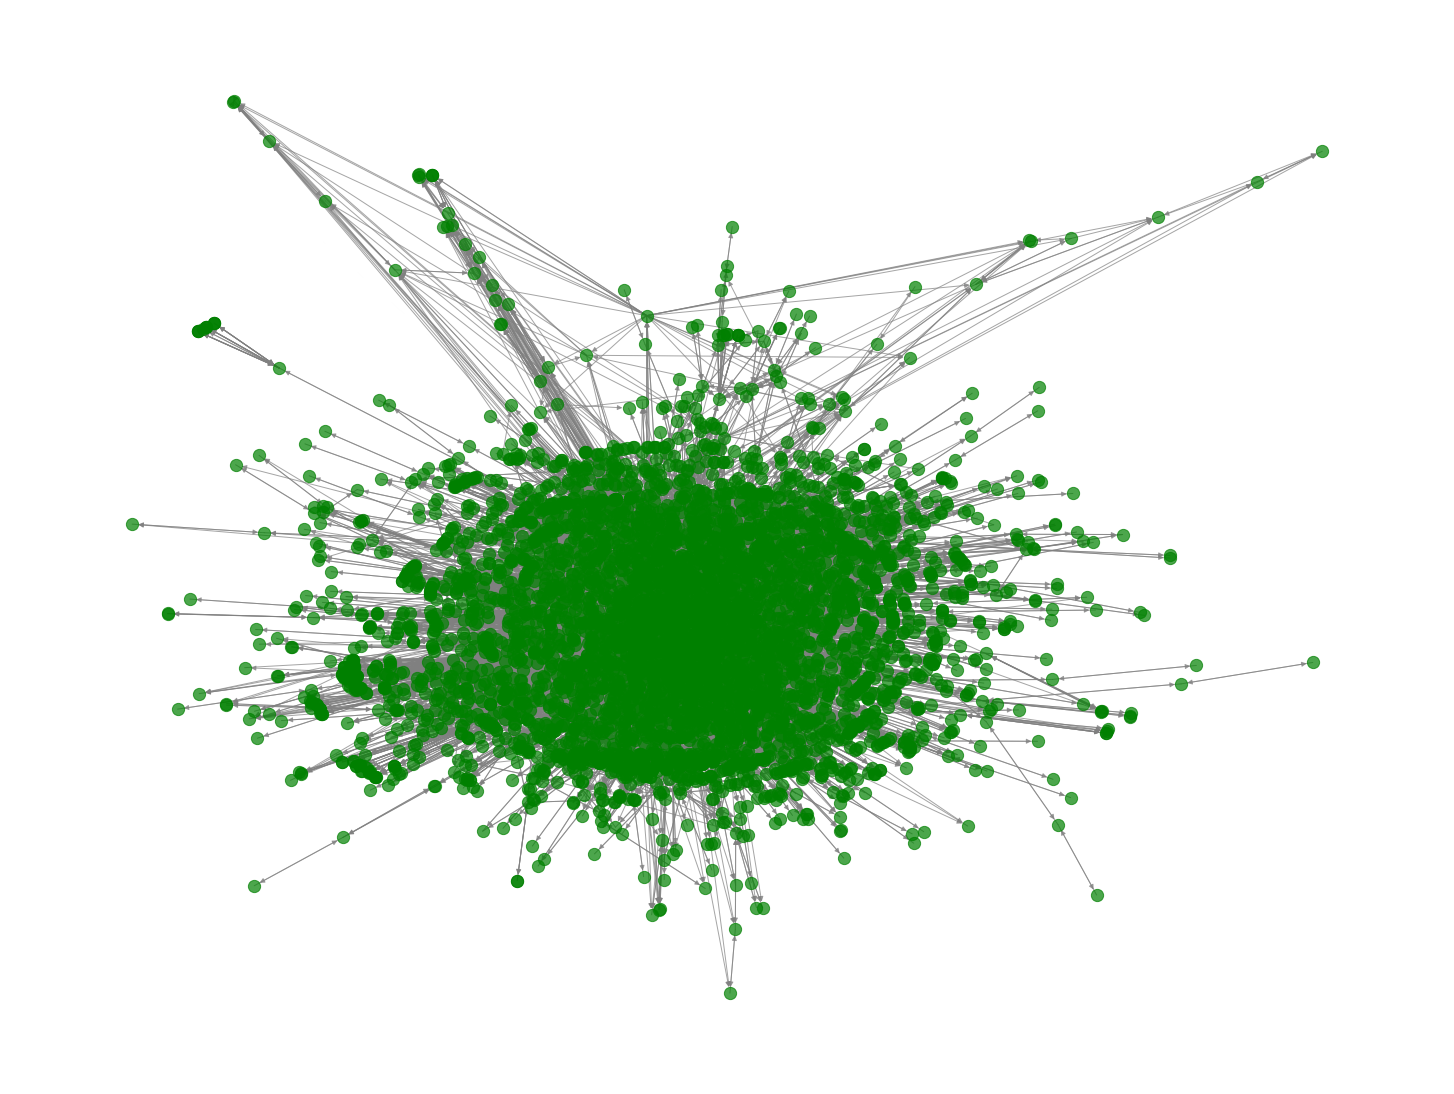

In [28]:
draw_graph(G_lar_str)

<h0 align=left><font size = 3>So as a start I will focus on the biggest strongly connected network.   </font></h0>

In [29]:
G_lar_str.number_of_edges()

33461

In [30]:
G_lar_str.number_of_nodes()

4709

## Focus on some(or one) node and their(or his) first neighbors 

<h0 align=left><font size = 3> Drawing the network of the first voisinage </font></h0>

## Finding out central nodes 

## Degree centrality 

<h0 align=left><font size = 3>In graph theory and network analysis, indicators of centrality identify the most important vertices within a graph. Applications include identifying the most influential person(s) in a social network, key infrastructure nodes in the Internet or urban networks, and super-spreaders of disease.</font></h0>

### In degree centrality 

In [31]:
def in_degree_centrality(G1):
    #Code to figure out the person who has the biggest number of neighbors 
    maximum = 0 
    node = 0
    in_degree_centrality = nx.in_degree_centrality(G1)
    for i in G1.nodes() : 
        if (in_degree_centrality[i]> maximum)  : 
            maximum = in_degree_centrality[i]
            node = i 
    #print(node)
    print('The maximum degree centrality is :',in_degree_centrality[node],'\n','And the node is :',node)
    return 

In [32]:
in_degree_centrality(G)

The maximum degree centrality is : 0.09098639455782312 
 And the node is : 35


In [33]:
# Top five in degree centrality 
sorted(nx.in_degree_centrality(G).values(),reverse=False)[:]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.00017006802721088434,
 0.000170068

### Out degree centrality

In [34]:
def out_degree_centrality(G1):
    #Code to figure out the person who has the biggest number of neighbors 
    maximum = 0 
    node = 0
    out_degree_centrality = nx.out_degree_centrality(G1)
    for i in G1.nodes() : 
        if (out_degree_centrality[i]> maximum)  : 
            maximum = out_degree_centrality[i]
            node = i 
    #print(node)
    print('The maximum degree centrality is :',out_degree_centrality[node],'\n','And the node is :',node)
    return 

In [35]:
out_degree_centrality(G)

The maximum degree centrality is : 0.12976190476190474 
 And the node is : 35


In [36]:
# Top five out degree centrality 
sorted(nx.out_degree_centrality(G).values(),reverse=True)[:5]

[0.12976190476190474,
 0.06904761904761904,
 0.06870748299319727,
 0.06751700680272109,
 0.049829931972789114]

<h0 align=left><font size = 3> We better have a look on the top nodes considering the out degree </font></h0>

In [37]:
def top_percent_in_degree_centrality(G1 , per = 0.02):
    degree_centrality = nx.in_degree_centrality(G1)

    lis=[]
    dic = dict(degree_centrality)

    #Top per of the data 
    n= int(per * G1.number_of_nodes())

    for i in range (0,n) :
        maximum = 0 
        node = 0
        for elt in dic : 
            if dic[elt]> maximum  : 
                maximum = dic[elt]
                node = elt
            
        del dic[node]
        lis.append(node)
    lis_degree=lis
    #print(lis_degree)
    return lis_degree

In [38]:
def top_percent_out_degree_centrality(G1 , per = 0.02):
    degree_centrality = nx.out_degree_centrality(G1)

    lis=[]
    dic = dict(degree_centrality)

    #Top per of the data 
    n= int(per * G1.number_of_nodes())

    for i in range (0,n) :
        maximum = 0 
        node = 0
        for elt in dic : 
            if dic[elt]> maximum  : 
                maximum = dic[elt]
                node = elt
            
        del dic[node]
        lis.append(node)
    lis_degree=lis
    #print(lis_degree)
    return lis_degree

In [39]:
top_percent_in_degree_centrality(G , per = 0.001)

[35, 2642, 1810, 2028, 905]

In [40]:
top_percent_out_degree_centrality(G , per = 0.001)

[35, 2642, 1810, 2125, 2028]

### Page Rank Algorithm 

<h0 align=left><font size = 3>PageRank (PR) is an algorithm used by Google Search to rank web pages in their search engine results.PageRank is a way of measuring the importance of website pages.</font></h0>

<h0 align=left><font size = 3>As the graph is not strongly connected I will use the Scaled Page Rank to find logical result and not being stucked in a black hole. </font></h0>

https://www.coursera.org/lecture/python-social-network-analysis/scaled-page-rank-xxW11

In [41]:
dic_page_rank = nx.pagerank(G, alpha=0.8, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight=None, dangling=None)

In [42]:
sorted(dic_page_rank.values(),reverse=True)

[0.015156414880804454,
 0.010452822549276982,
 0.0066617574471375405,
 0.0065333401600590965,
 0.005589216955602689,
 0.005118831477140435,
 0.004961644698636455,
 0.0046829748389386845,
 0.004531673010018132,
 0.004393038679474745,
 0.004030745113163221,
 0.0038804024904971297,
 0.003721087146854188,
 0.003240485430484213,
 0.0031681429996837248,
 0.003134436649015066,
 0.0029897553748825167,
 0.0028893035493292394,
 0.002870386229951486,
 0.0027956251078327995,
 0.002740529465581429,
 0.002642370802586605,
 0.0026416850433196542,
 0.002620434163482835,
 0.0025815250531457585,
 0.002450038651249135,
 0.0024368312662314353,
 0.002371823929372128,
 0.002322367331561358,
 0.002295124286719845,
 0.0022904249955952743,
 0.002274441384824764,
 0.0022702212468553203,
 0.002249863845662816,
 0.002207422708506582,
 0.002183276299807727,
 0.002147212276175268,
 0.0021407232977028547,
 0.0020810554825534053,
 0.0020377885621951836,
 0.0020346962630384065,
 0.0020048109560744597,
 0.0019114208874

In [43]:
def top_percent_page_rank(G , per = 0.02):
    page_rank = nx.pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight=None, dangling=None)

    lis=[]
    dic = dict(page_rank)

    #Top per of the data 
    n= int(per * G.number_of_nodes())

    for i in range (0,n) :
        maximum = 0 
        node = 0
        for elt in dic : 
            if dic[elt]> maximum  : 
                maximum = dic[elt]
                node = elt
            
        del dic[node]
        lis.append(node)
    lis_degree=lis
    #print(lis_degree)
    return lis_degree

In [44]:
G.number_of_nodes()

5881

In [45]:
top_percent_page_rank(G , per = 0.002)

[35, 2642, 1810, 2028, 7, 905, 1953, 1, 4172, 4197, 13]

In [46]:
G.in_degree[35] 

535

In [47]:
G.out_degree[35]

763

In [48]:
list_of_degrees=sorted(dict(G.in_degree()).values(),reverse=True)

In [49]:
list_of_degrees;

### HITS Algorithm 

<h0 align=left><font size = 3>The HITS algorithm computes two numbers for a node. Authorities estimates the node value based on the incoming links. Hubs estimates the node value based on outgoing links.</font></h0>

In [50]:
def top_percent_auth(G , per = 0.02):
    h,a =nx.hits(G, max_iter=100, tol=1e-08, nstart=None, normalized=True)
    auth = a

    lis=[]
    dic = dict(auth)

    #Top per of the data 
    n= int(per * G.number_of_nodes())

    for i in range (0,n) :
        maximum = 0 
        node = 0
        for elt in dic : 
            if dic[elt]> maximum  : 
                maximum = dic[elt]
                node = elt
            
        del dic[node]
        lis.append(node)
    lis_degree=lis
    #print(lis_degree)
    return lis_degree

In [51]:
def top_percent_hub(G , per = 0.02):
    h,a =nx.hits(G, max_iter=100, tol=1e-08, nstart=None, normalized=True)
    hub = h

    lis=[]
    dic = dict(hub)

    #Top per of the data 
    n= int(per * G.number_of_nodes())

    for i in range (0,n) :
        maximum = 0 
        node = 0
        for elt in dic : 
            if dic[elt]> maximum  : 
                maximum = dic[elt]
                node = elt
            
        del dic[node]
        lis.append(node)
    lis_degree=lis
    #print(lis_degree)
    return lis_degree

In [52]:
#Top percent of auth in order 
top_percent_auth(G , per = 0.001)

[2642, 905, 1810, 35, 2028]

In [53]:
#Top percent of hubs in order
top_percent_hub(G , per = 0.001)

[1810, 905, 2642, 35, 2028]

## Summary of people classification considering many metrics

<h0 align=left><font size = 3>Basic classification based on the degree of nodes. </font></h0>

In [54]:
top_percent_in_degree_centrality(G , per = 0.002)

[35, 2642, 1810, 2028, 905, 1, 4172, 7, 4197, 13, 2125]

In [55]:
top_percent_out_degree_centrality(G , per = 0.002)

[35, 2642, 1810, 2125, 2028, 905, 4172, 7, 1, 3129, 13]

<h0 align=left><font size = 3>Advanced popularity classification. </font></h0>

In [56]:
top_percent_page_rank(G , per = 0.002) # scaled

[35, 2642, 1810, 2028, 7, 905, 1953, 1, 4172, 4197, 13]

In [57]:
#Top percent of auth in order 
top_percent_auth(G , per = 0.002)

[2642, 905, 1810, 35, 2028, 4172, 1, 4291, 1334, 1018, 4197]

In [58]:
#Top percent of hubs in order
top_percent_hub(G , per = 0.002)

[1810, 905, 2642, 35, 2028, 2125, 4291, 4172, 2388, 3988, 1334]

## Scoring people in the platform 

In [59]:
G.number_of_nodes()

5881

In [60]:
G.number_of_edges()

35592

In [61]:
sorted(dict(G.in_degree()).values(),reverse=True)[:20];

In [62]:
sorted(dict(G.out_degree()).values(),reverse=True)[:20];

### Trust Score 

### Step 1 : Initial Scoring 

<h0 align=left><font size = 3>Considering the mean of the received scores . And most importantly considering the in_degree for each node.</font></h0>

<h0 align=left><font size = 3>Hyperparameter 1 : betta . </font></h0>

In [63]:
# in degree values 
sorted(dict(G.in_degree()).values(),reverse=False)[:];

In [64]:
y=np.array(list(dict(G.in_degree()).values()))

In [65]:
df=pd.DataFrame(y)

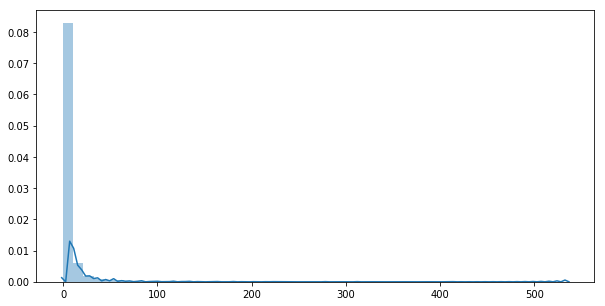

In [66]:
fig= plt.figure(figsize=(10,5))
ax = sns.distplot(y)

In [67]:
df.describe()

,0
count,5881.000000
mean,6.052032
std,17.675082
min,0.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,535.000000


In [68]:
def percentage (list,threshold) :
    # give the percentage of elements that are in the list and are less or equal to the threhold 
    per = (len([elt for elt in list if elt <= threshold])/G.number_of_nodes())*100
    return per  

In [69]:
list = sorted(dict(G.in_degree()).values())

In [70]:
threshold = 2
percentage (list,threshold)

59.377656861078044

In [71]:
threshold = 3
percentage (list,threshold)

68.98486651929943

In [72]:
threshold = 4
percentage (list,threshold)

74.68117667063424

In [73]:
threshold = 5
percentage (list,threshold)

78.67709573201836

In [74]:
threshold = 6
percentage (list,threshold)

81.89083489202517

<h0 align=left><font size = 3> 78.68 % (almost 80%) of the nodes have 5 or less than 5 in_degrees.  
    60% of the nodes have 3 or less than 3 in_degree .
To give opportunity to the new nodes and to prevent all sorts of rejecting the good people we will make a threshold of at least betta received scores to calculate the mean (the initial trust score) . </font></h0>

In [75]:
# Hyperparameter 1 : betta , threshold : defines the minimum of received scores to calculate the trust 
betta = 3

In [76]:
# initialisation the trust score to 0 
for node in G.nodes():
    G.nodes[node]['trust']=0

In [77]:
# making the trust score the sum of all the scores 
for edge in G.edges(data=True) : 
    G.nodes[edge[1]]['trust']=G.nodes[edge[1]]['trust']+edge[2]['score']

In [78]:
# considering the mean not the sum 
for node in G.nodes():
    if (G.in_degree(node) >= betta):
        G.nodes[node]['trust']= G.nodes[node]['trust'] / (G.in_degree(node))
    else :
        G.nodes[node]['trust']= 0

In [79]:
dict(G.nodes(data=True))

{6: {'trust': 1.3863636363636365},
 2: {'trust': 3.0},
 5: {'trust': 2.3333333333333335},
 1: {'trust': 3.5442477876106193},
 15: {'trust': 1.5384615384615385},
 4: {'trust': 3.111111111111111},
 3: {'trust': -0.2857142857142857},
 13: {'trust': 1.7853403141361257},
 16: {'trust': 0},
 10: {'trust': 6.0},
 7: {'trust': 2.8425925925925926},
 21: {'trust': 2.5},
 20: {'trust': 2.0},
 8: {'trust': 5.666666666666667},
 17: {'trust': 2.473684210526316},
 23: {'trust': 3.3076923076923075},
 25: {'trust': 2.6106194690265485},
 26: {'trust': 1.5454545454545454},
 28: {'trust': 1.6363636363636365},
 29: {'trust': 2.057142857142857},
 31: {'trust': 0},
 32: {'trust': 1.0},
 34: {'trust': 1.0},
 35: {'trust': 1.8990654205607476},
 36: {'trust': 1.878787878787879},
 37: {'trust': 1.3333333333333333},
 44: {'trust': -2.6666666666666665},
 39: {'trust': 3.16},
 45: {'trust': 2.8181818181818183},
 19: {'trust': 2.6},
 46: {'trust': 0},
 47: {'trust': 0},
 51: {'trust': 1.9655172413793103},
 52: {'tru

###  Step 2 : Considering the initial score of the person who scored

<h0 align=left><font size = 3> Considering the initial score of the person who scored. </font></h0>

<h0 align=left><font size = 3> Only scores that are received from people with strictly positive trust_scores are considered. </font></h0>

In [80]:
# hyperparameter 2 : num_iter
num_iter = 10

In [81]:
error_list = []
i=1
while i<=num_iter :
    error = 0
    # initialisation the trust_2 score to 0 
    dic = {}
    for node in G.nodes():
        dic[node]=0
    # calculating trust_2 (considering trust_1 and the received scores )
    for edge in G.edges(data=True) : 
        if G.nodes[edge[0]]['trust'] > 0 : 
            if G.in_degree(edge[1]) >= betta :  
                dic[edge[1]]=dic[edge[1]]+(edge[2]['score']/(G.in_degree(edge[1])))
    # trust receives trust_2
    for node in G.nodes() : 
        error = error + abs(G.nodes[node]['trust']-dic[node])
        G.nodes[node]['trust']=dic[node]
    error_list.append(error)
    i=i+1 

In [91]:
error_list

[1286.7190506719132,
 157.93782464135924,
 12.272915305751228,
 0.6237997039204296,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [115]:
list_iter = [0]*num_iter
for i in range(1,len(list_iter)+1) : 
    list_iter[i-1]=i

In [116]:
list_iter

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Text(0, 0.5, 'Epsilon')

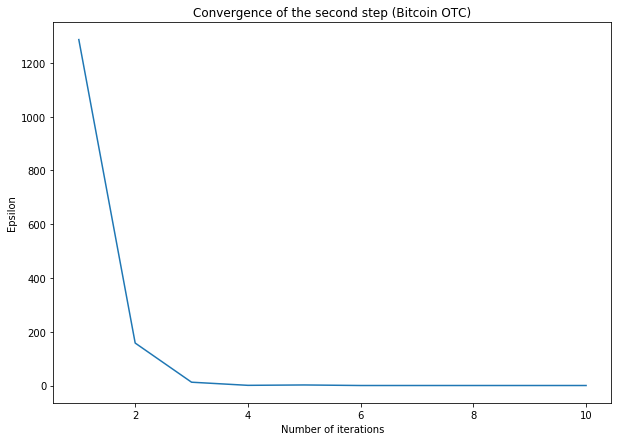

In [104]:
f, ax = plt.subplots(figsize=(10,7))

plt.plot(list_iter,error_list)
plt.title('Convergence of the second step (Bitcoin OTC)')
plt.xlabel('Number of iterations')
plt.ylabel('Epsilon')
#plt.savefig('c.jpg')

### Step 3 : Giving greater importance to the nodes who are most popular 

<h0 align=left><font size = 3> Considering the whole note from the most popular nodes and only consider alpha percent of the note of the other nodes.</font></h0>

In [86]:
# Hyperparameter 3 : alpha , the percentage taken from the received score from non popular nodes
alpha = 0.75

In [87]:
# Hyperparametre 4 : gamma, the percentage of nodes that are considered as specially popular 
gamma = 0.2

In [88]:
# scaled
list_popular_nodes= top_percent_page_rank(G , per = gamma) 

In [89]:
dic = {}
for node in G.nodes():
    dic[node]=0

# calculating trust_2 (considering trust_1 and the received scores )
for edge in G.edges(data=True) : 
    if G.nodes[edge[0]]['trust'] > 0 : 
        if G.in_degree(edge[1]) >= betta :  
            if edge[0] in list_popular_nodes : 
                dic[edge[1]]=dic[edge[1]]+(edge[2]['score']/(G.in_degree(edge[1])))
            else : 
                dic[edge[1]]=dic[edge[1]]+((edge[2]['score']*alpha)/(G.in_degree(edge[1])))

# trust receives dic values 
for node in G.nodes() : 
    G.nodes[node]['trust']=dic[node]

In [90]:
dict(G.nodes(data=True))

{6: {'trust': 1.2784090909090902},
 2: {'trust': 2.8170731707317076},
 5: {'trust': 2.3333333333333335},
 1: {'trust': 3.088495575221236},
 15: {'trust': 1.4807692307692304},
 4: {'trust': 2.7453703703703707},
 3: {'trust': -0.5000000000000004},
 13: {'trust': 1.4410994764397873},
 16: {'trust': 0},
 10: {'trust': 6.0},
 7: {'trust': 2.280092592592595},
 21: {'trust': 2.0000000000000004},
 20: {'trust': 1.3000000000000003},
 8: {'trust': 5.583333333333334},
 17: {'trust': 2.381578947368421},
 23: {'trust': 2.1826923076923075},
 25: {'trust': 2.2632743362831844},
 26: {'trust': 1.0454545454545454},
 28: {'trust': 1.568181818181818},
 29: {'trust': 1.5857142857142859},
 31: {'trust': 0},
 32: {'trust': 0.9999999999999999},
 34: {'trust': 1.0},
 35: {'trust': 1.027570093457947},
 36: {'trust': 1.3560606060606057},
 37: {'trust': 1.208333333333333},
 44: {'trust': 0.6666666666666666},
 39: {'trust': 3.1},
 45: {'trust': 1.477272727272727},
 19: {'trust': 2.6000000000000005},
 46: {'trust':